2024년 7월 기준 인구 데이터를 가지고, 여러가지 데이터 분석과 시각화를 해봅시다.

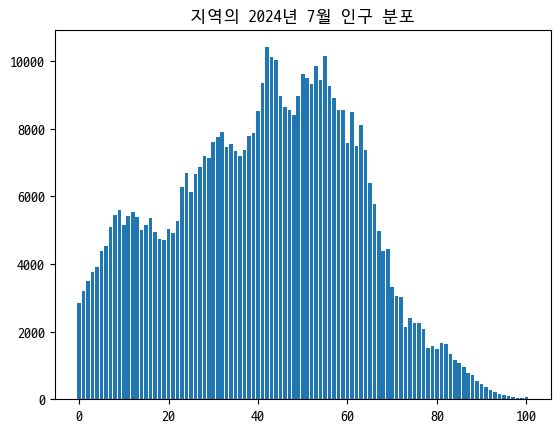

In [10]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

popList = []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]
        for i in row[3:104] : # 남녀 연령별 인구 (0세 ~ 100세 이상)
            popList.append(int(i.replace(',', '')))

file.close()
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 인구 분포")
plt.bar(range(101), popList)
plt.show()

위 코드를 응용하여 서울시 강서구 지역의 남자(blue), 여자(pink) 분포도를 각각 그리세요
1150000000

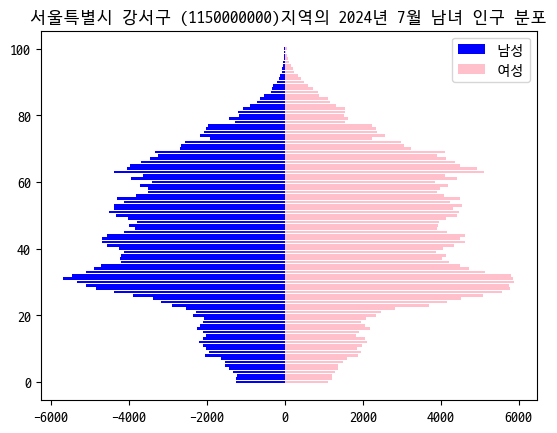

In [3]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

maleList = []
femaleList= []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]

        for i in range(101) :
            maleList.append(int(row[i+106].replace(',', ''))*-1)
            femaleList.append(int(row[i + 209].replace(',', '')))

file.close()

plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 남녀 인구 분포")

plt.barh(range(101), maleList, color='blue', label='남성')
plt.barh(range(101), femaleList, color='pink', label='여성')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.legend()
plt.show()

In [ ]:
네, 맞습니다. 일반적인 바 차트에서 x축의 0을 기준으로 왼쪽과 오른쪽 모두에서 양수로 보이게 하려면, 기본적으로 barh 함수의 데이터 변환만으로는 완벽히 해결할 수 없습니다. 그러나, x축을 왼쪽과 오른쪽 모두 양수로 나타내는 방법이 몇 가지 있습니다.

데이터를 수동으로 조정하여 양쪽 모두에서 양수로 보이게 하는 방법:

데이터의 시각화를 조금 더 복잡하게 조정하여 해결할 수 있습니다. 남성 데이터를 음수로 표시하고 여성 데이터를 양수로 표시하되, x축의 표시 형식을 변경하여 - 기호를 숨기고 두 데이터 세트를 모두 양수로 보이도록 할 수 있습니다.
X축의 눈금을 조정하여 마이너스 기호를 숨기기:

축의 레이블을 수동으로 조정하여 - 기호가 표시되지 않도록 하는 방법입니다. Matplotlib의 FuncFormatter를 이용하여 사용자 정의 포맷터를 만들 수 있습니다.
아래는 FuncFormatter를 사용하여 x축의 레이블에서 마이너스 기호를 숨기는 예제입니다:

변경 사항 설명
FuncFormatter 사용:

FuncFormatter를 사용하여 x축의 레이블을 사용자 정의 포맷으로 설정합니다. 이 포맷은 음수 값을 양수로 표시하지만, 원래 데이터는 음수로 유지합니다.
포맷 함수:

format_func 함수는 음수 값을 양수로 변환하여 표시합니다. 이 함수는 음수 값을 변환할 때 - 기호를 숨깁니다.
이 방법을 사용하면 시각적으로 왼쪽과 오른쪽 모두에서 양수로 표시되지만, 실제 데이터는 음수로 유지하여 원래의 데이터 분포를 유지할 수 있습니다.

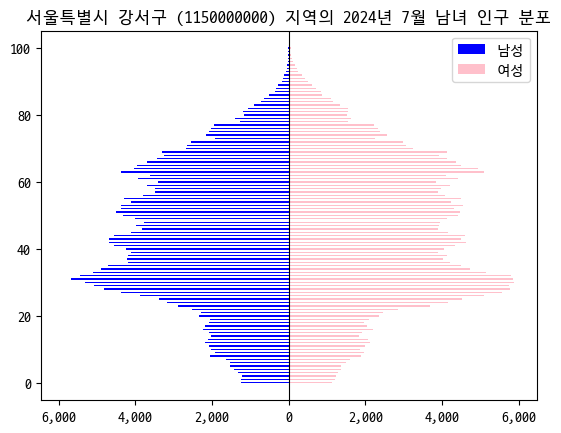

In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터 파일 열기
with open('202407_population.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file, delimiter=',')

    maleList = []
    femaleList = []
    addrName = ''

    # 사용자로부터 지역 코드 입력 받기
    code = input('조회하시길 원하는 지역의 코드를 입력하세요: ')

    # 데이터에서 해당 지역 코드 찾기
    for row in data:
        if code in row[0]:
            addrName = row[0]

            # 남성과 여성 인구 데이터를 리스트에 저장
            for i in range(101):
                maleList.append(int(row[i+106].replace(',', '')))
                femaleList.append(int(row[i+209].replace(',', '')))
            break  # 찾은 지역 데이터가 있으면 루프 종료

# 시각화 설정
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + " 지역의 2024년 7월 남녀 인구 분포")

# 막대 차트를 각각 남성과 여성 데이터로 생성
indices = range(101)
plt.barh(indices, [-m for m in maleList], color='blue', label='남성', align='center', height=0.4)  # 남성 데이터를 음수로 변환
plt.barh(indices, femaleList, color='pink', label='여성', align='center', height=0.4)  # 여성 데이터는 그대로

# x축의 범위 조정
max_value = max(max(maleList), max(femaleList))
plt.xlim(-max_value * 1.1, max_value * 1.1)  # x축의 범위를 양쪽 방향으로 확장

# x축 포맷터 설정 (음수 기호 숨기기)
def format_func(value, tick_number):
    if value < 0:
        return f'{-value:,.0f}'
    return f'{value:,.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# x=0에 수직선 추가
plt.axvline(0, color='black', linewidth=0.8)  # x=0에 수직선 추가

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.legend()
plt.show()


문) 제주도에는 과연 여자가 많을까? 제주도 남녀 인구 비율을 파이 차트로 시각화 해보자
5000000000

336330 335738


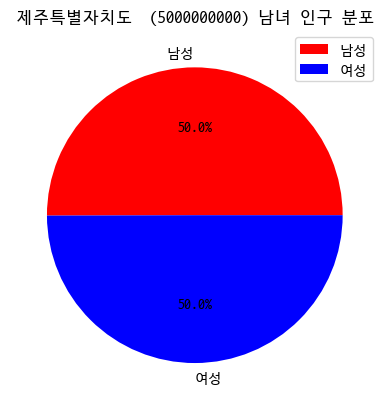

In [20]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

jejuPopulation = []
addrName = ''


for row in data :
    if '5000000000' in row[0] :
        addrName = row[0]
        jejuPopulation.append(int(row[104].replace(',', '')))
        jejuPopulation.append(int(row[207].replace(',', '')))

file.close()

plt.rc('font', family='D2Coding')
plt.title(addrName + " 남녀 인구 분포")
label = ['남성', '여성']
colors=['red','blue'] 

print(maleList, femaleList)
plt.pie(jejuPopulation, labels= label, autopct='%.1f%%' , colors=colors) 

plt.legend()
plt.show()
